In [236]:
from nltk import sent_tokenize
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import pairwise_distances_argmin_min

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/austinkrause/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df = pd.read_csv('df_with_gensim_summaries.csv')

In [28]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1.1'], axis = 1)

In [33]:
df.head()

,title,content,category,gensim_summary,first_100,sent_tokenized
0,Agent Cooper in Twin Peaks is the audience: on...,And never more so than in Showtime’s new...,Longform,"In the second season finale, back in 1991, the...",And never more so than in Showtime’s new serie...,[' And never more so than in Showtime’s n...
1,"AI, the humanity!",AlphaGo’s victory isn’t a defeat for hum...,Longform,When speaking to DeepMind and Google developer...,AlphaGo’s victory isn’t a defeat for humans — ...,[' AlphaGo’s victory isn’t a defeat for h...
2,Massive attack,How a weapon against war became a weapon...,Longform,International visitors for the event are commo...,How a weapon against war became a weapon again...,[' How a weapon against war became a weap...
3,Brain drain,Genius quietly laid off a bunch of its e...,Longform,"In a post on the Genius blog at the time, co-f...",Genius quietly laid off a bunch of its enginee...,[' Genius quietly laid off a bunch of its...
4,Facebook takes flight,Inside the test flight of Facebook’s fir...,Longform,But if your goal is to stay in the air for a l...,Inside the test flight of Facebook’s first int...,[' Inside the test flight of Facebook’s f...


In [34]:
titles = df.title.tolist()
summaries = df.gensim_summary.tolist()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [59]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(summaries)

In [69]:
pred_clusters = model.predict(X)

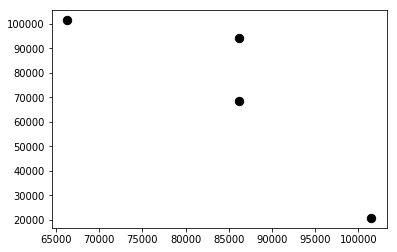

In [133]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
#plt.scatter(X[:, 0], X[:, 1], c=pred_clusters, s=10)
terms = vectorizer.get_feature_names()
plt.scatter(order_centroids[:, 0], order_centroids[:, 1], c='black', s=70)

In [119]:
import ast

In [156]:
len(ast.literal_eval(test))

85

In [264]:
def cluster_article_sents(sentences):
    #tune function for edge cases
    if type(sentences) == str:
        #if text is a list within a string:
        if sentences[0] == '[':
            #perform literal eval of string (take off the quotes and keep the list)
            document = ast.literal_eval(sentences)
            print('literal eval')
        else:
            #if raw text, tokenize the sentences
            document = sent_tokenize(sentences, language = 'en')
            print('raw text')
    else:
        document = sentences
        print('already tokenize')
    print(document[:10])
    print(len(document))
    
    #vectorize sentences of the document
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(document)
    
    #cluster sentences within document
    k = int(np.floor(len(document)**.5))
    print(k)
    model = KMeans(n_clusters = k, random_state = 0) #, init = 'k-means++', max_iter = 100, n_init = 1)
    
    #fit model to document
    model.fit(X)
   
    #create empty lists to hold ################
    avg = []
    closest = []
    
    for i in range(k):
        idx = np.where(model.labels_ == i)[0]
        print(idx)
        avg.append(np.mean(idx))
    print(avg)
    print(model.cluster_centers_)
    #closest, _ = pairwise_distances_argmin_min(model.cluster_centers_, !!!!)

    
    
    #plotting
    centers = model.cluster_centers_ #.argsort()[:, ::-1]
    #plt.scatter(X[:, 0], X[:, 1], c = X, s=10)
    terms = vectorizer.get_feature_names()
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70)

In [221]:
test = df.sent_tokenized[1]
len(ast.literal_eval(test))

67

In [252]:
sample = ['this is one sentence.', 'this is a second sentence.', 'this is a third.']

literal eval
['      AlphaGo’s victory isn’t a defeat for humans — it’s an opportunity A loss for humanity!', 'Man succumbs to machine!', 'If you heard about AlphaGo’s latest exploits last week — crushing the world’s best Go player and confirming that artificial intelligence had mastered the ancient Chinese board game — you may have heard the news delivered in doomsday terms.There was a certain melancholy to Ke Jie’s capitulation, to be sure.', 'The 19-year-old Chinese prodigy declared he would never lose to an AI following AlphaGo’s earthshaking victory over Lee Se-dol last year.', 'To see him onstage last week, nearly bent double over the Go board and fidgeting with his hair, was to see a man comprehensively put in his place.But focusing on that would miss the point.', 'DeepMind, the Google-owned company that developed AlphaGo, isn’t attempting to crush humanity — after all, the company is made up of humans itself.', 'AlphaGo represents a major human achievement and the takeaway shou

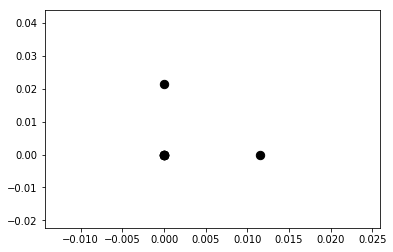

In [265]:
cluster_article_sents(test)

In [125]:
np.sqrt(85)

9.219544457292887

In [14]:
sample = """TEHRAN, Iran (AP) — Iran's foreign minister warned the U.S. on Monday that it "cannot expect to stay safe"
after launching what he described as an economic war against Tehran, taking a hard-line stance amid a visit by Germany's 
top diplomat seeking to defuse tensions. A stern-faced Mohammad Javad Zarif offered a series of threats over the 
ongoing tensions gripping the Persian Gulf. The crisis takes root in President Donald Trump's decision over a year 
ago to withdraw America from Iran's 2015 nuclear deal with world powers. Trump also reinstated tough sanctions on 
Iran, targeting its oil sector. "Mr. Trump himself has announced that the U.S. has launched an economic war against 
Iran," Zarif said. "The only solution for reducing tensions in this region is stopping that economic war." """ 


In [19]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')


In [20]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


In [21]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [23]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [35]:
def stem_tokenize_all(lst):
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in lst:
        allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
        totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)
    return totalvocab_stemmed, totalvocab_tokenized

In [37]:
total_vocab_stemmed, total_vocab_tokenized = stem_tokenize_all(summaries)

In [51]:
len(total_vocab_tokenized)

7984855

In [52]:
len(total_vocab_stemmed)

7984855

In [39]:
#create new df with stemmed vocab as the index and tokenized words as column
vocab_df = pd.DataFrame({'words': total_vocab_tokenized}, index = total_vocab_stemmed)
print(str(vocab_df.shape[0]) + ' items in vocab_frame')

7984855 items in vocab_frame


In [42]:
vocab_df.head()

,words
in,in
the,the
second,second
season,season
final,finale


<h3>TF-IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time 
#fit the vectorizer to summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(summaries) 

tfidf_matrix.shape

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(97064, 2)

In [57]:
#get list of features from the tf-idf matrix
features = tfidf_vectorizer.get_feature_names()

In [58]:
features

['s', 'said']

In [53]:
#find cosine similarity 

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


KeyboardInterrupt: 

In [ ]:
dist